# Classification on IRIS Dataset

## Load Data

In [ ]:
import pandas as pd
data=pd.read_csv('IRIS.csv')

In [ ]:
print(data.head())
print()
print(data.columns)

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


## Renaming Columns

In [ ]:
data=data.rename(columns={'sepal_length':'X1', 'sepal_width':'X2', 'petal_length':'X3', 'petal_width':'X4',
       'species':'L'})

In [ ]:
data

,X1,X2,X3,X4,L
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Preprocessing Data

The label is not a number, its a name of species. I use the following code to change the labels to numbers as well as store the original labels

In [ ]:
#Lets first import the preprocessing module
from sklearn import preprocessing
#Now let's form a label Encoder model
le = preprocessing.LabelEncoder()
#Now we use feed the label column to the model
le.fit(data['L'])
#Model will go through column and find the unique labels (Number of classes that are there)
#Following line will print the labels found in the column
list(le.classes_)

#This will replace these labels with the numbers in data
data['L']=le.transform(data['L'])

#Printing transformed data labels
print(data['L'])

#Adding another column for storing mapping of numbers to labels
#This will be used later to give appropriate legends for plots
data['Label'] = le.inverse_transform(data['L'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: L, Length: 150, dtype: int64


In [ ]:
data.head()

,X1,X2,X3,X4,L,Label
0,5.1,3.5,1.4,0.2,0,Iris-setosa
1,4.9,3.0,1.4,0.2,0,Iris-setosa
2,4.7,3.2,1.3,0.2,0,Iris-setosa
3,4.6,3.1,1.5,0.2,0,Iris-setosa
4,5.0,3.6,1.4,0.2,0,Iris-setosa


So now we are ready for classification! Labels are changed to 0,1 and 2.

## Visualize Data

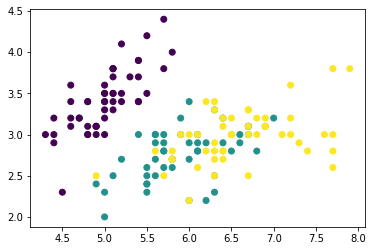

In [ ]:
import matplotlib.pyplot as plt
#plot not stressed class
plt.scatter(data['X1'], data['X2'],c=data['L'])

## Visualize Data - Suitable for different classes

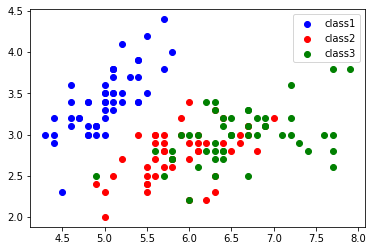

In [ ]:
plt.scatter(data['X1'][data['L']==0], data['X2'][data['L']==0],label='class1',color='blue')
plt.scatter(data['X1'][data['L']==1], data['X2'][data['L']==1],label='class2',color='red')
plt.scatter(data['X1'][data['L']==2], data['X2'][data['L']==2],label='class3',color='green')
plt.legend()

## Split Data

Being consistant in the random selection from different classes!

In [ ]:
from sklearn.model_selection import train_test_split
X_training, X_testing, Y_training, Y_testing = train_test_split(data[['X1','X2','X3','X4']], data['L'], test_size=0.3)

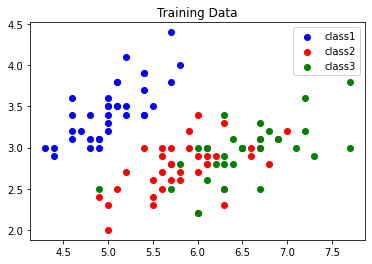

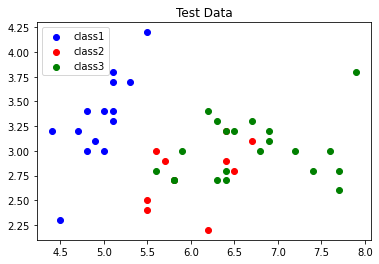

In [ ]:
plt.scatter(X_training['X1'][Y_training==0],X_training['X2'][Y_training==0],label='class1',color='blue')
plt.scatter(X_training['X1'][Y_training==1],X_training['X2'][Y_training==1],label='class2',color='red')
plt.scatter(X_training['X1'][Y_training==2],X_training['X2'][Y_training==2],label='class3',color='green')
plt.title('Training Data')
plt.legend()
plt.figure()
plt.scatter(X_testing['X1'][Y_testing==0],X_testing['X2'][Y_testing==0],label='class1',color='blue')
plt.scatter(X_testing['X1'][Y_testing==1],X_testing['X2'][Y_testing==1],label='class2',color='red')
plt.scatter(X_testing['X1'][Y_testing==2],X_testing['X2'][Y_testing==2],label='class3',color='green')
plt.title('Test Data')
plt.legend()

## Running Classifiers on Dataset

### MDC Classifier

1. Use the code that described in lectures and classify data using MDC

2. Then count the number of points that are missclassified in the training data and test data.


#### Training MDC Classifier

In [ ]:
from sklearn.neighbors import NearestCentroid
mdc_model = NearestCentroid()
mdc_model.fit(X_training, Y_training)

NearestCentroid()

#### Predicting Class Labels, based on Trained Model

In [ ]:
y_training_pred = mdc_model.predict(X_training)
y_testing_pred = mdc_model.predict(X_testing)

#### Evaluating Model, based on Predictions

This section plots predicted values for training data against different features.

***(Note: Click on the graph to zoom in)***

##### Defining Features for plots

In [ ]:
#Features in the data
#The feature names should be corresponding to the column names in the dataframe.
features = ['X1', 'X2', 'X3', 'X4']

Defining Standard colors for Classification

In [ ]:
std_classification_colors = ['blue','red','pink','brown']
centroid_classification_color = 'orange'
wrong_classification_color = 'green'

##### Plotting predicted values for training data against different features

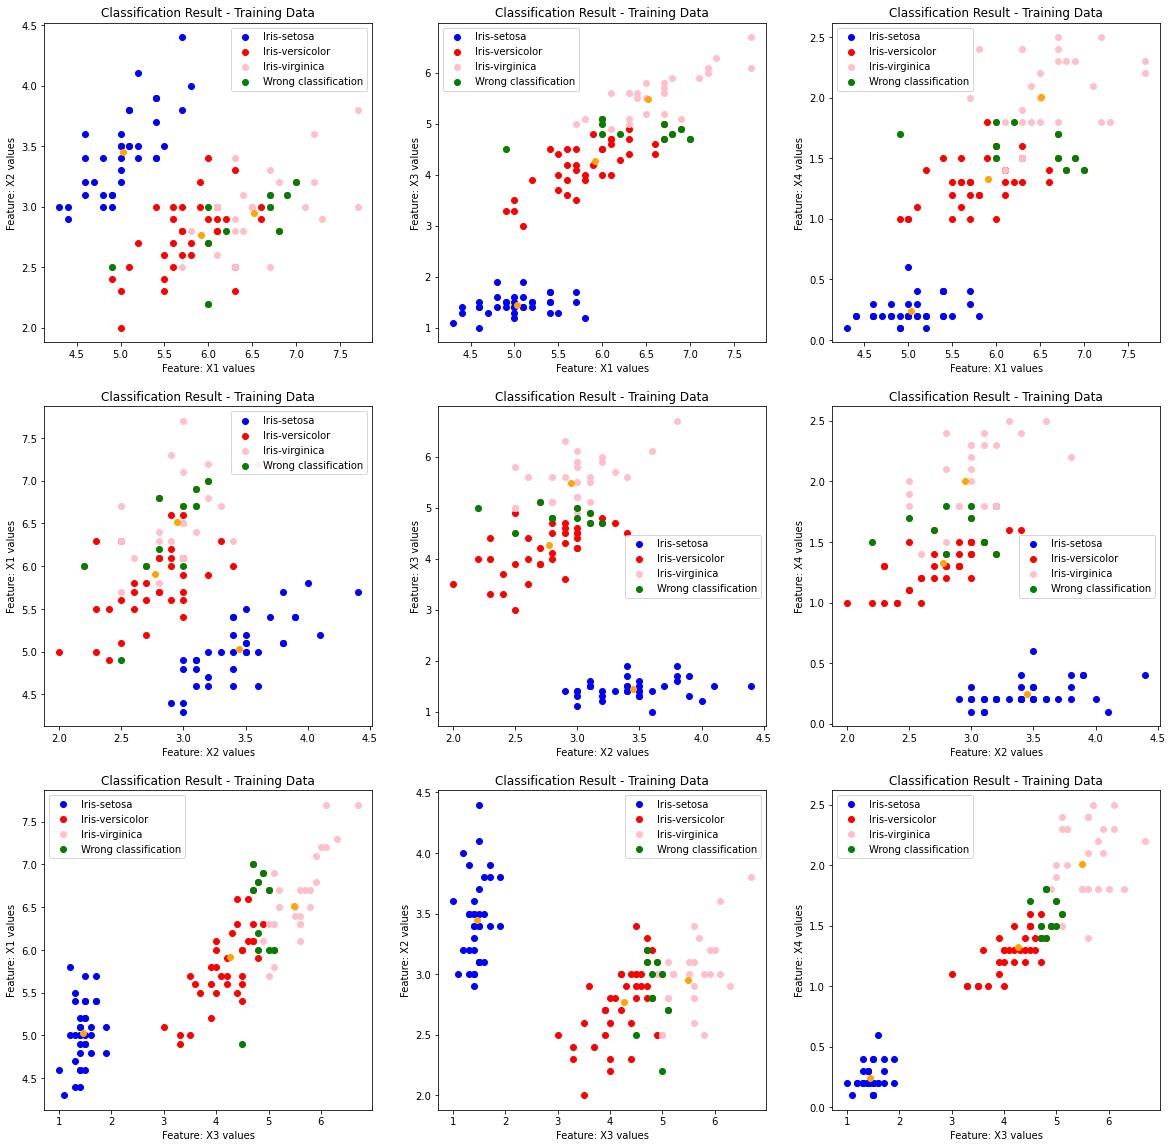

In [ ]:
fig, axes = plt.subplots(len(features)-1, len(features)-1, figsize=(20, 20))
for i, feature in enumerate(features[0:len(features)-1]): 
  j=0  
  #Plotting data against other features
  for other_feature in features:
    if other_feature != feature:
        #Loop for plotting different classes of data
        for y, c in zip(set(Y_training),std_classification_colors):
          #Plotting different classes of data in X_training, as they are classified
          axes[i][j].scatter(X_training[feature][Y_training==y],X_training[other_feature][Y_training==y],label=list(data['Label'][data['L'] == y])[0], color = c)
          #Plotting the mean of the data points, belonging to this class
          axes[i][j].scatter(X_training[feature][Y_training==y].mean(),X_training[other_feature][Y_training==y].mean(),c=centroid_classification_color)
        #Plotting 'Wrongly Classified' data points by the model
        axes[i][j].scatter(X_training[feature][Y_training!=y_training_pred],X_training[other_feature][Y_training!=y_training_pred],label='Wrong classification',color=wrong_classification_color)

        axes[i][j].set_xlabel(f"Feature: {feature} values")
        axes[i][j].set_ylabel(f"Feature: {other_feature} values")
        axes[i][j].set_title('Classification Result - Training Data')
        axes[i][j].legend()
        j+=1

##### Plotting predicted values for testing data against different features

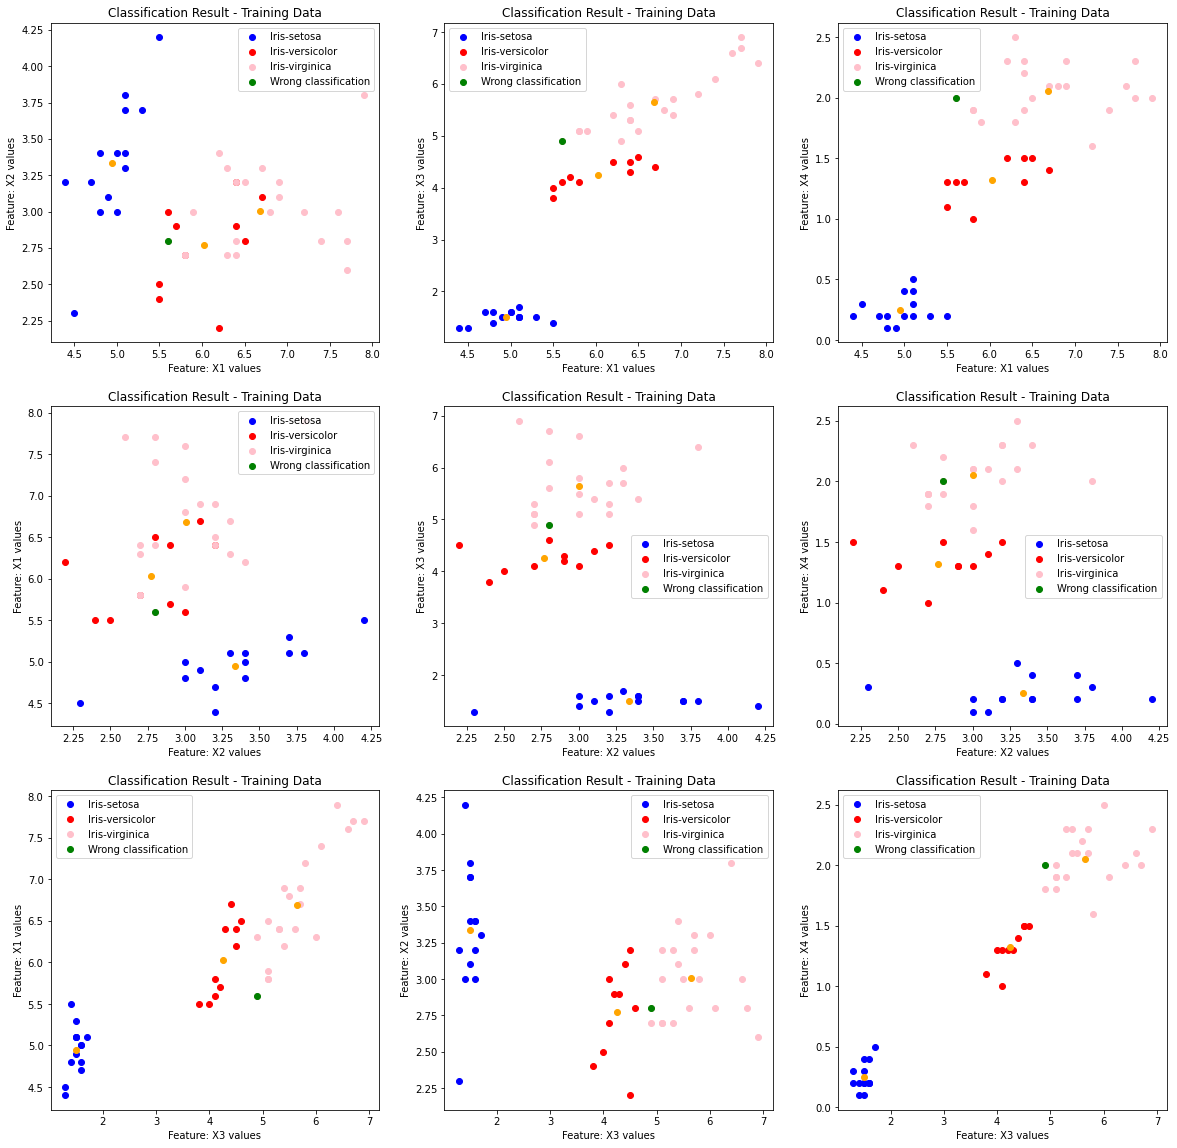

In [ ]:
fig, axes = plt.subplots(len(features)-1, len(features)-1, figsize=(20, 20))
for i, feature in enumerate(features[0:len(features)-1]): 
  j=0
  #Plotting data against other features
  for other_feature in features:
    if other_feature != feature:
        #Loop for plotting different classes of data
        for y, c in zip(set(Y_testing),std_classification_colors):
          #Plotting different classes of data in X_testing, as they are classified
          axes[i][j].scatter(X_testing[feature][Y_testing==y],X_testing[other_feature][Y_testing==y],label=list(data['Label'][data['L'] == y])[0], color = c)
          #Plotting the mean of the data points, belonging to this class
          axes[i][j].scatter(X_testing[feature][Y_testing==y].mean(),X_testing[other_feature][Y_testing==y].mean(),c=centroid_classification_color)
        #Plotting 'Wrongly Classified' data points by the model
        axes[i][j].scatter(X_testing[feature][Y_testing!=y_testing_pred],X_testing[other_feature][Y_testing!=y_testing_pred],label='Wrong classification',color=wrong_classification_color)

        axes[i][j].set_xlabel(f"Feature: {feature} values")
        axes[i][j].set_ylabel(f"Feature: {other_feature} values")
        axes[i][j].set_title('Classification Result - Training Data')
        axes[i][j].legend()
        j+=1

### K-Nearst Neighbors Classifier

1. Use the code that described in lectures and classify data using 5NN (5 nearest neighbors)

2. Then count the number of points that are missclassified in the training data and test data.


#### Training KNN Classifier, having **K=5**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(X_training,Y_training)

KNeighborsClassifier()

#### Predicting Class Labels, based on Trained Model

In [ ]:
y_training_pred = modelKNN.predict(X_training)
y_testing_pred = modelKNN.predict(X_testing)

#### Evaluating Model, based on Predictions

##### Defining Features for plots

In [ ]:
#Features in the data
#The feature names should be corresponding to the column names in the dataframe.
features = ['X1', 'X2', 'X3', 'X4']

Defining Standard colors for Classification

In [ ]:
std_classification_colors = ['blue','red','pink','brown']
wrong_classification_color = 'green'

##### Plotting predicted values for training data against different features

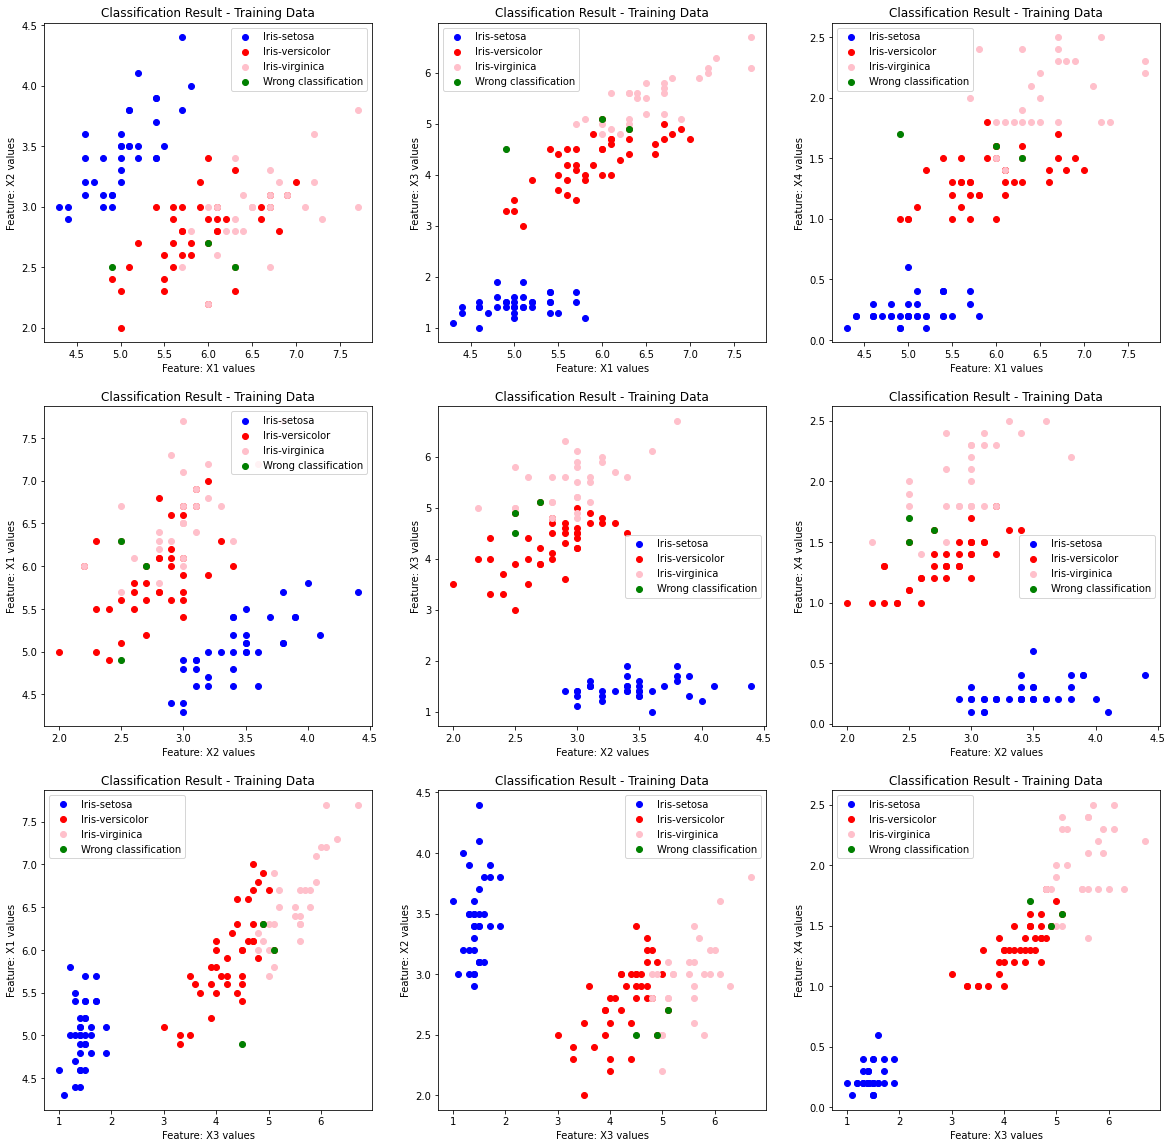

In [ ]:
fig, axes = plt.subplots(len(features)-1, len(features)-1, figsize=(20, 20))
for i, feature in enumerate(features[0:len(features)-1]): 
  j=0     
  #Plotting data against other features
  for other_feature in features:
    if other_feature != feature:
        #Loop for plotting different classes of data
        for y, c in zip(set(Y_training),std_classification_colors):
          #Plotting different classes of data in X_training, as they are classified
          axes[i][j].scatter(X_training[feature][Y_training==y],X_training[other_feature][Y_training==y],label=list(data['Label'][data['L'] == y])[0], color = c)
        #Plotting 'Wrongly Classified' data points by the model
        axes[i][j].scatter(X_training[feature][Y_training!=y_training_pred],X_training[other_feature][Y_training!=y_training_pred],label='Wrong classification',color=wrong_classification_color)

        axes[i][j].set_xlabel(f"Feature: {feature} values")
        axes[i][j].set_ylabel(f"Feature: {other_feature} values")
        axes[i][j].set_title('Classification Result - Training Data')
        axes[i][j].legend()
        j+=1

##### Plotting predicted values for testing data against different features

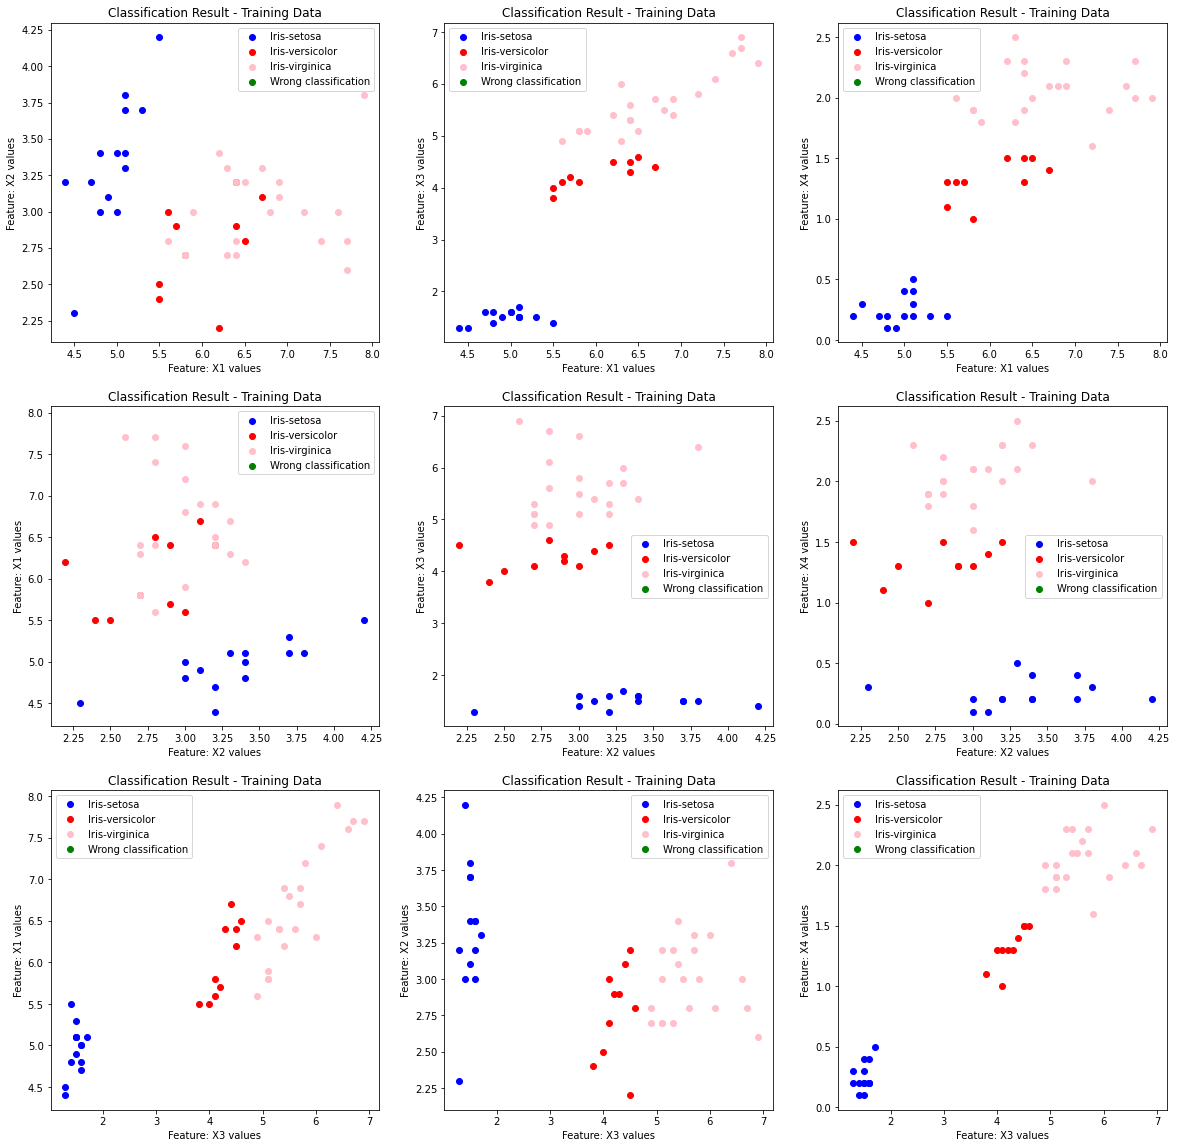

In [ ]:
fig, axes = plt.subplots(len(features)-1, len(features)-1, figsize=(20, 20))
for i, feature in enumerate(features[0:len(features)-1]): 
  j=0       
  #Plotting data against other features
  for other_feature in features:
    if other_feature != feature:
        #Loop for plotting different classes of data
        for y, c in zip(set(Y_testing),std_classification_colors):
          #Plotting different classes of data in X_testing, as they are classified
          axes[i][j].scatter(X_testing[feature][Y_testing==y],X_testing[other_feature][Y_testing==y],label=list(data['Label'][data['L'] == y])[0], color = c)
        #Plotting 'Wrongly Classified' data points by the model
        axes[i][j].scatter(X_testing[feature][Y_testing!=y_testing_pred],X_testing[other_feature][Y_testing!=y_testing_pred],label='Wrong classification',color=wrong_classification_color)

        axes[i][j].set_xlabel(f"Feature: {feature} values")
        axes[i][j].set_ylabel(f"Feature: {other_feature} values")
        axes[i][j].set_title('Classification Result - Training Data')
        axes[i][j].legend()
        j+=1

## Conclusion

**KNN** performs better than **MDC** classifier on IRIS dataset.